In [143]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split#%%

In [144]:
data = pd.read_csv('../../case data/australia rain/weatherAUS.csv',usecols=['MaxTemp','Rainfall','RainTomorrow'])
data

,MaxTemp,Rainfall,RainTomorrow
0,22.9,0.6,No
1,25.1,0.0,No
2,25.7,0.0,No
3,28.0,0.0,No
4,32.3,1.0,No
...,...,...,...
145455,23.4,0.0,No
145456,25.3,0.0,No
145457,26.9,0.0,No
145458,27.0,0.0,No


In [145]:
data.dropna(inplace=True)
train,test = train_test_split(data.sample(50000),test_size=0.2,random_state=64)
train.shape,test.shape

((40000, 3), (10000, 3))

In [146]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [147]:
class KNN:
    def __init__(self,x,y,k=5):
        self.hyper_parameter = x
        self.target = y
        self.neighbors = k
        self.predicted_cluster = []

    def predict(self,x):
        # add rules for inputs: TODO
        for i in range(x.shape[0]):
            distances = np.sqrt(np.sum(np.square(self.hyper_parameter - x.loc[i]),axis=1))
            closest_neighbors = self.target.loc[distances.sort_values().head(self.neighbors).index]
            cluster = ss.mode(closest_neighbors.values).mode[0][0]
            self.predicted_cluster.append(cluster)

        return self.predicted_cluster

In [148]:
index = (np.sqrt(np.sum(np.square(train[['MaxTemp','Rainfall']] - test[['MaxTemp','Rainfall']].loc[0]),axis=1)).sort_values().head(11)).index
neigbhors = train[['RainTomorrow']].loc[index]
neigbhors

,RainTomorrow
16557,Yes
37757,No
23722,No
23709,No
2183,No
2171,No
9490,No
20004,No
30935,No
26284,No


In [149]:
baseline_model = KNN(train[['MaxTemp','Rainfall']],train[['RainTomorrow']])
test['predicted_label'] = baseline_model.predict(test[['MaxTemp','Rainfall']])

In [150]:
test['RainTomorrow'][test['RainTomorrow']==test['predicted_label']].shape[0]/test.shape[0]

0.7584

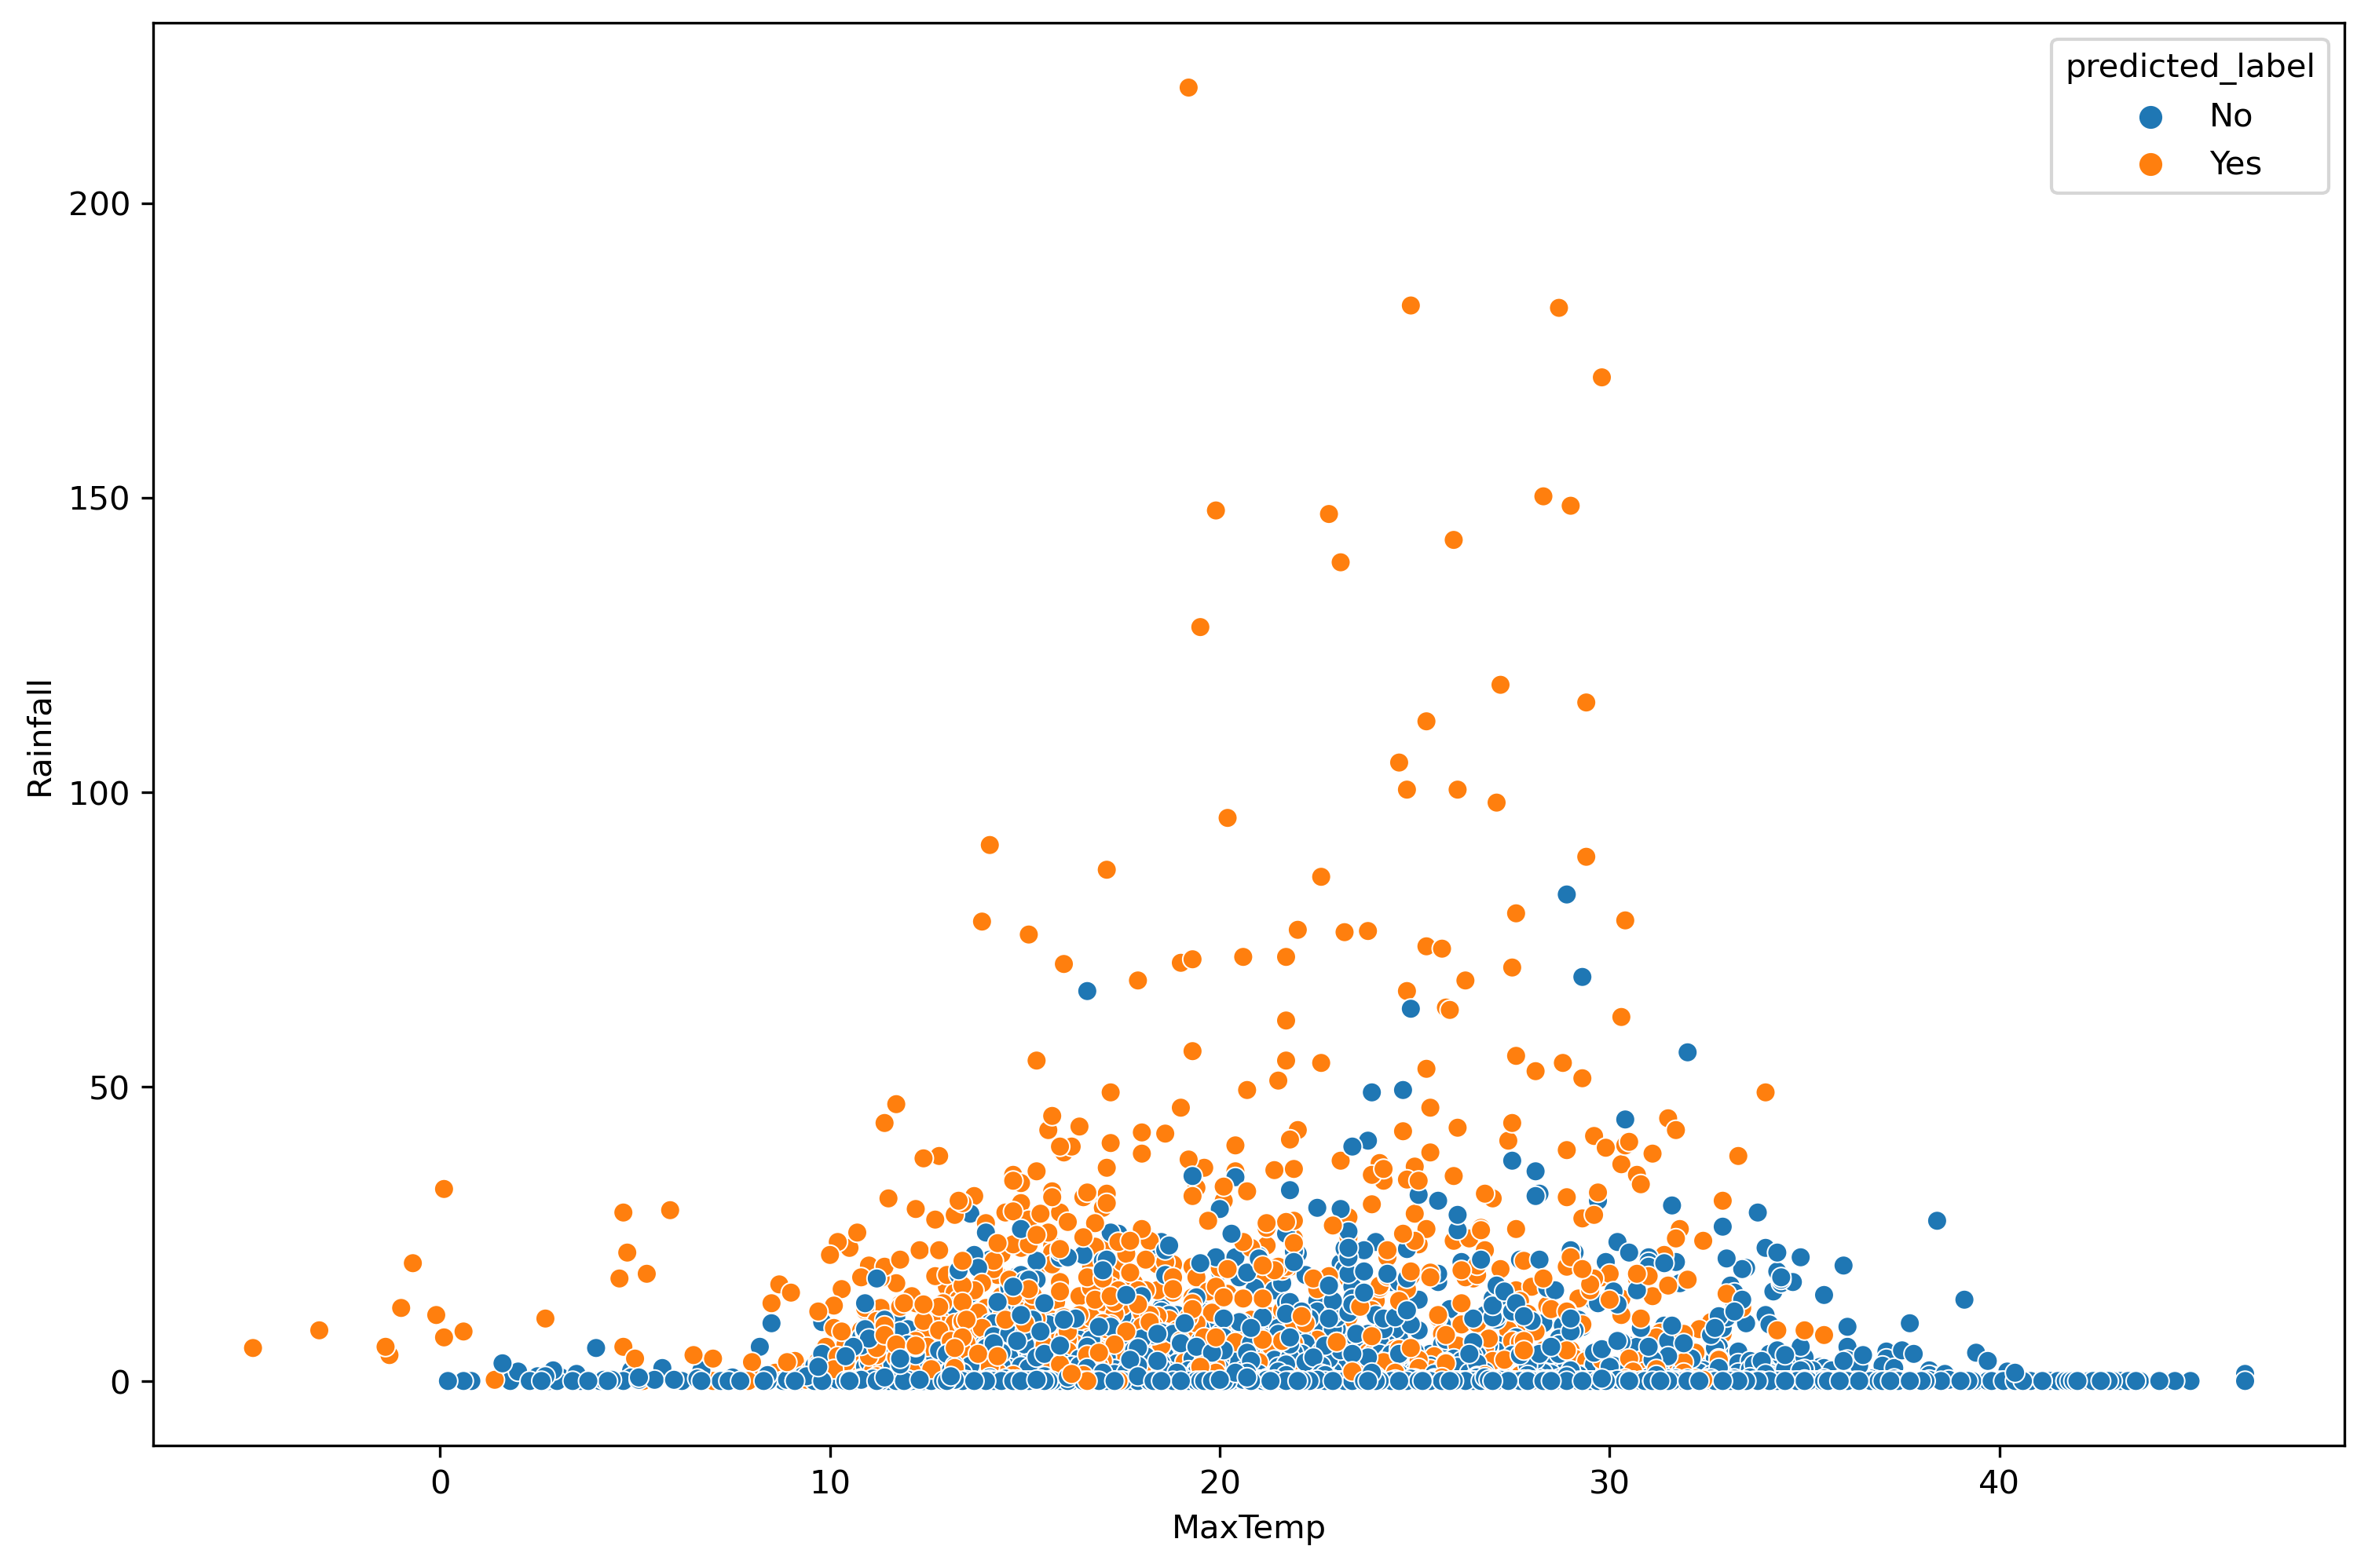

In [151]:
plt.figure(figsize=[12,8],dpi=300)
sns.scatterplot(x=test['MaxTemp'],y=test['Rainfall'],hue=test['predicted_label'])
plt.show()